<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMDB-Movie-Review-Sentiment-Classification" data-toc-modified-id="IMDB-Movie-Review-Sentiment-Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMDB Movie Review Sentiment Classification</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Process" data-toc-modified-id="Process-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Process</a></span></li><li><span><a href="#Configure-notebook,-import-libraries,-and-import-dataset" data-toc-modified-id="Configure-notebook,-import-libraries,-and-import-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Configure notebook, import libraries, and import dataset</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Define-global-variables" data-toc-modified-id="Define-global-variables-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Define global variables</a></span></li></ul></li><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Helper Functions</a></span></li><li><span><a href="#Examine-the-data" data-toc-modified-id="Examine-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Examine the data</a></span></li><li><span><a href="#Cleaning-and-preprocessing" data-toc-modified-id="Cleaning-and-preprocessing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Cleaning and preprocessing</a></span><ul class="toc-item"><li><span><a href="#Load-labeled-training-data" data-toc-modified-id="Load-labeled-training-data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Load labeled training data</a></span></li><li><span><a href="#Write-helper-functions" data-toc-modified-id="Write-helper-functions-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Write helper functions</a></span><ul class="toc-item"><li><span><a href="#Sentence-cleaner" data-toc-modified-id="Sentence-cleaner-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Sentence cleaner</a></span></li></ul></li><li><span><a href="#Create-list-of-Doc2Vec-TaggedDocument-objects" data-toc-modified-id="Create-list-of-Doc2Vec-TaggedDocument-objects-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Create list of Doc2Vec TaggedDocument objects</a></span></li></ul></li><li><span><a href="#Train-Doc2Vec-model---Initial-pass" data-toc-modified-id="Train-Doc2Vec-model---Initial-pass-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Train Doc2Vec model - Initial pass</a></span><ul class="toc-item"><li><span><a href="#Define-the-Doc2Vec-model-object" data-toc-modified-id="Define-the-Doc2Vec-model-object-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Define the Doc2Vec model object</a></span></li><li><span><a href="#Build-vocabulary-from-a-sequence-of-sentences-(i.e.-our-reviews)" data-toc-modified-id="Build-vocabulary-from-a-sequence-of-sentences-(i.e.-our-reviews)-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Build vocabulary from a sequence of sentences (i.e. our reviews)</a></span></li><li><span><a href="#Train-the-Doc2Vec-model" data-toc-modified-id="Train-the-Doc2Vec-model-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Train the Doc2Vec model</a></span></li><li><span><a href="#Create-a-feature-set-utilizing-the-trained-Doc2Vec-model" data-toc-modified-id="Create-a-feature-set-utilizing-the-trained-Doc2Vec-model-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Create a feature set utilizing the trained Doc2Vec model</a></span></li><li><span><a href="#Pass-the-feature-set-to-the-Scikit-learn-models-for-training-and-evaluation" data-toc-modified-id="Pass-the-feature-set-to-the-Scikit-learn-models-for-training-and-evaluation-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Pass the feature set to the Scikit-learn models for training and evaluation</a></span><ul class="toc-item"><li><span><a href="#Kaggle-model" data-toc-modified-id="Kaggle-model-8.5.1"><span class="toc-item-num">8.5.1&nbsp;&nbsp;</span>Kaggle model</a></span></li><li><span><a href="#Standard-write-up-models" data-toc-modified-id="Standard-write-up-models-8.5.2"><span class="toc-item-num">8.5.2&nbsp;&nbsp;</span>Standard write-up models</a></span></li><li><span><a href="#Standard-model-comments" data-toc-modified-id="Standard-model-comments-8.5.3"><span class="toc-item-num">8.5.3&nbsp;&nbsp;</span>Standard model comments</a></span></li></ul></li></ul></li><li><span><a href="#Tuning-Doc2Vec" data-toc-modified-id="Tuning-Doc2Vec-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Tuning Doc2Vec</a></span><ul class="toc-item"><li><span><a href="#Implementation" data-toc-modified-id="Implementation-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Implementation</a></span></li><li><span><a href="#Create-the-model,-build-the-vocab,-and-train" data-toc-modified-id="Create-the-model,-build-the-vocab,-and-train-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Create the model, build the vocab, and train</a></span></li><li><span><a href="#Train-and-assess-classifiers" data-toc-modified-id="Train-and-assess-classifiers-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Train and assess classifiers</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Comments</a></span></li></ul></li><li><span><a href="#Combining-Doc2Vec-models" data-toc-modified-id="Combining-Doc2Vec-models-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Combining Doc2Vec models</a></span><ul class="toc-item"><li><span><a href="#Create-Doc2Vec-models,-build-vocabulary,-and-train" data-toc-modified-id="Create-Doc2Vec-models,-build-vocabulary,-and-train-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Create Doc2Vec models, build vocabulary, and train</a></span></li><li><span><a href="#Combination-one:--Train-and-assess-classifiers" data-toc-modified-id="Combination-one:--Train-and-assess-classifiers-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Combination one:  Train and assess classifiers</a></span></li><li><span><a href="#Combination-two:--Train-and-assess-classifiers" data-toc-modified-id="Combination-two:--Train-and-assess-classifiers-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Combination two:  Train and assess classifiers</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Comments</a></span></li></ul></li><li><span><a href="#Increased-vocabulary-and-combined-Doc2Vec-models" data-toc-modified-id="Increased-vocabulary-and-combined-Doc2Vec-models-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Increased vocabulary and combined Doc2Vec models</a></span><ul class="toc-item"><li><span><a href="#Process-and-combine-unlabeled-data" data-toc-modified-id="Process-and-combine-unlabeled-data-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Process and combine unlabeled data</a></span></li><li><span><a href="#Create-Doc2Vec-models,-build-vocabulary,-and-train" data-toc-modified-id="Create-Doc2Vec-models,-build-vocabulary,-and-train-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Create Doc2Vec models, build vocabulary, and train</a></span></li><li><span><a href="#Combination-one:--Train-and-assess-classifiers" data-toc-modified-id="Combination-one:--Train-and-assess-classifiers-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Combination one:  Train and assess classifiers</a></span></li><li><span><a href="#Combination-Two:--Train-and-assess-classifiers" data-toc-modified-id="Combination-Two:--Train-and-assess-classifiers-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Combination Two:  Train and assess classifiers</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-11.5"><span class="toc-item-num">11.5&nbsp;&nbsp;</span>Comments</a></span></li></ul></li><li><span><a href="#Manual-training-and-feature-set-creation-utilizing-combined-Doc2Vec-models" data-toc-modified-id="Manual-training-and-feature-set-creation-utilizing-combined-Doc2Vec-models-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Manual training and feature set creation utilizing combined Doc2Vec models</a></span><ul class="toc-item"><li><span><a href="#Create-Doc2Vec-models,-build-vocabulary,-and-train" data-toc-modified-id="Create-Doc2Vec-models,-build-vocabulary,-and-train-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Create Doc2Vec models, build vocabulary, and train</a></span></li><li><span><a href="#Combination-one:--Train-and-assess-classifiers" data-toc-modified-id="Combination-one:--Train-and-assess-classifiers-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Combination one:  Train and assess classifiers</a></span></li><li><span><a href="#Combination-two:--Train-and-assess-classifiers" data-toc-modified-id="Combination-two:--Train-and-assess-classifiers-12.3"><span class="toc-item-num">12.3&nbsp;&nbsp;</span>Combination two:  Train and assess classifiers</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-12.4"><span class="toc-item-num">12.4&nbsp;&nbsp;</span>Comments</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

<h1>IMDB Movie Review Sentiment Classification</h1>

<img style="float: left; margin-right: 15px; width: 30%; height: 30%;" src="images/imdb.jpg" />

# Purpose

The overall goal of this set of write-ups is to explore a number of machine learning algorithms utilizing natural language processing (NLP) to classify sentiment IMDB movie reviews.

The specific goals of this write-up include:
1. Create a set of word embeddings from the IMDb movie review text utilizing [Word2vec](https://en.wikipedia.org/wiki/Word2vec)
2. Cluster the embeddings utilizing a K-nearest neighbors algorithm into a set of centroids
2. Run the models from the [last write-up](./Model-06.ipynb) against the centroid feature set
3. Determine if the centroid feature set improves our ability to correctly classify movie review sentiment

This series of write-ups is inspired by the Kaggle [
Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial) competition.

References:
* [Gensim Doc2Vec](https://radimrehurek.com/gensim/models/doc2vec.html)
* [Original paper](https://arxiv.org/abs/1405.4053) by Mikilov and Le

Dataset source:  [IMDB Movie Reviews](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)

# Process

Previously covered [here](./Model-06.ipynb#Process).

# Configure notebook, import libraries, and import dataset

## Import libraries

In [71]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import smart_open

from random import shuffle

import pandas as pd
from pandas import set_option

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# http://www.nltk.org/index.html
# pip install nltk
import nltk
from nltk.corpus import stopwords


# Creating function implementing punkt tokenizer for sentence splitting
import nltk.data

# Only need this the first time...
# nltk.download('punkt')


# https://www.crummy.com/software/BeautifulSoup/bs4/doc/
# pip install BeautifulSoup4
from bs4 import BeautifulSoup


# https://pypi.org/project/gensim/
# pip install gensim
import gensim.models.doc2vec
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument


import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO)

import multiprocessing

cores = multiprocessing.cpu_count()
assert(gensim.models.doc2vec.FAST_VERSION > -1, "Going to be slow!")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Define global variables

In [10]:
seed = 10
np.random.seed(seed)

# Opens a GUI that allows us to download the NLTK data
# nltk.download()

dataPath = os.path.join('.', 'datasets', 'imdb_movie_reviews')
labeledTrainData = os.path.join(dataPath, 'labeledTrainData.tsv')

# Helper Functions

The following function trains the "standard" set of Scikit-learn models we've been evaluating and returns the results.  This should reduce the verbosity of the write-up below.

In [ ]:
def trainModels(xTrain, yTrain, modelsToRun = ['LR', 'LDA', 'SVM']):
    # Init vars
    folds = 10
    seed = 10
    models = []
    results = {}

    # Use accuracy since this is a classification
    score = 'accuracy'
    
    # Instantiate model objects
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))

    # Create a Pandas DF to hold all our spiffy results
    _df = pd.DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])

    # Run the models
    for modelName, model in models:
        if (modelName in modelsToRun) or (modelsToRun == 'all'):
            print("Training", modelName, "....")
            # Implement K-fold cross validation where K = 10
            kFold = KFold(n_splits = folds, random_state = seed)
            results[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = score)
            _df.loc[len(_df)] = list([modelName, results[modelName].mean(), results[modelName].std()])

    # Print results sorted by Mean desc, StdDev asc, Model asc
    return(results, _df)

And another function to draw the whisker plots of model performance:

In [12]:
def makeWhisker(results):
    figure = plt.figure(figsize = (8,6))
    figure.suptitle("Model Results")
    axis = figure.add_subplot(111)
    plt.boxplot(results.values())
    axis.set_xticklabels(results.keys())
    plt.show()

# Examine the data

Previously covered [here](./Model-06.ipynb#Examine-the-data).

# Cleaning and preprocessing

## Load labeled training data

(Previous process justification and methodology also previously covered [here](./Model-06.ipynb#Cleaning-and-preprocessing).)

We need to load the labeled training data exactly as we've done in previous write-ups:

In [13]:
# Pull in the labeled data
df = pd.read_csv(labeledTrainData, sep = '\t', header = 0, quoting = 3)

# Sanity check
print('df.shape :', df.shape)

## Write helper functions

Doc2Vec expects a list of `TaggedDocument` objects.  The first argument of the `TaggedDocument` constructor is a contiguous list of words (which we'll clean as usual), and the second argument is a unique tag.  For example, here is what a sample `TaggedDocument` object looks like:

```
TaggedDocument(words=['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', ...... <SNIP>], tags=[0])
```

In order to facilitate this we'll first write the "cleaner" function to process the review text:

### Sentence cleaner

Take a given sentence and process/clean it (i.e. remove HTML and other cruft, lower case the text, etc.).

In [15]:
# Update stop word helper function to output a list of words

# Clean IMDB review text
def cleanReview(review, removeStopWords = False):
    # Convert the stop words to a set
    stopWords = set(stopwords.words("english"))
    
    # Remove HTML
    clean = BeautifulSoup(review)
    
    # Remove non-alpha chars
    clean = re.sub("[^a-zA-Z]", ' ', clean.get_text())
    
    # Convert to lower case and "tokenize"
    clean = clean.lower().split()
    
    # Remove stop words
    if removeStopWords:
        clean = [x for x in clean if not x in stopWords]
    
    # Return results
    return clean

A quick examination of the output:

In [16]:
# Examine
cleanReview(df.iloc[25,2])[:12]

['looking',
 'for',
 'quo',
 'vadis',
 'at',
 'my',
 'local',
 'video',
 'store',
 'i',
 'found',
 'this']

## Create list of Doc2Vec TaggedDocument objects

Next we need to create a collection of `TaggedDocument` objects; one object for each review:

In [18]:
taggedDocs = []

for i, s in enumerate(df.iloc[:,2]):
    clean = cleanReview(s)
    taggedDocs.append(TaggedDocument(clean, [i]))

In [63]:
# Sanity check we have the same number of objects as reviews
len(taggedDocs)

25000

In [62]:
# Examine an example:
taggedDocs[0]

TaggedDocument(words=['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again', 'maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent', 'moonwalker', 'is', 'part', 'biography', 'part', 'feature', 'film', 'which', 'i', 'remember', 'going', 'to', 'see', 'at', 'the', 'cinema', 'when', 'it', 'was', 'originally', 'released', 'some', 'of', 'it', 'has', 'subtle', 'messages', 'about', 'mj', 's', 'feeling', 'towards', 'the', 'press', 'and', 'also', 'the', 'obvious', 'message', 'of', 'drugs', 'are', 'bad', 'm', 'kay', 'visually', 'impressive', 'but', 'of', 'course', 'this', '

# Train Doc2Vec model - Initial pass

We are now ready to train the Doc2Vec model.  The process will go something like this:
1. Define the Doc2Vec model object
2. Build vocabulary from a sequence of sentences (i.e. our reviews)
3. Train the Doc2Vec model (Doc2Vec uses a inner shallow neural network used to train the embeddings)
4. Create a feature set utilizing the trained Doc2Vec model
5. Pass the feature set to the Scikit-learn models for training and evaluation

So, let's get started!

## Define the Doc2Vec model object

In [259]:
doc2vecModel = Doc2Vec(vector_size=50, min_count=2, epochs=40)

2018-11-06 16:45:18,455 : WARNING : consider setting layer size to a multiple of 4 for greater performance


## Build vocabulary from a sequence of sentences (i.e. our reviews)

In [260]:
doc2vecModel.build_vocab(taggedDocs)

2018-11-06 16:45:18,986 : INFO : collecting all words and their counts
2018-11-06 16:45:18,987 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-11-06 16:45:19,425 : INFO : PROGRESS: at example #10000, processed 2385574 words (5457085/s), 51527 word types, 10000 tags
2018-11-06 16:45:19,899 : INFO : PROGRESS: at example #20000, processed 4747503 words (4990659/s), 67813 word types, 20000 tags
2018-11-06 16:45:20,139 : INFO : collected 74218 word types and 25000 unique tags from a corpus of 25000 examples and 5920713 words
2018-11-06 16:45:20,140 : INFO : Loading a fresh vocabulary
2018-11-06 16:45:20,237 : INFO : effective_min_count=2 retains 46350 unique words (62% of original 74218, drops 27868)
2018-11-06 16:45:20,239 : INFO : effective_min_count=2 leaves 5892845 word corpus (99% of original 5920713, drops 27868)
2018-11-06 16:45:20,374 : INFO : deleting the raw counts dictionary of 74218 items
2018-11-06 16:45:20,376 : INFO : sample=0.001 downsamp

## Train the Doc2Vec model

In [261]:
doc2vecModel.train(taggedDocs, total_examples = doc2vecModel.corpus_count, epochs = doc2vecModel.epochs)

2018-11-06 16:45:21,740 : INFO : training model with 3 workers on 46350 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2018-11-06 16:45:22,750 : INFO : EPOCH 1 - PROGRESS: at 20.86% examples, 938389 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:45:23,753 : INFO : EPOCH 1 - PROGRESS: at 41.17% examples, 918002 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:45:24,763 : INFO : EPOCH 1 - PROGRESS: at 62.62% examples, 928145 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:45:25,771 : INFO : EPOCH 1 - PROGRESS: at 81.88% examples, 906147 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:45:26,604 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 16:45:26,613 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:45:26,615 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 16:45:26,616 : INFO : EPOCH - 1 : training on 5920713 raw words (4441554 effective words) took 4.9s, 911851 effecti

2018-11-06 16:46:07,204 : INFO : EPOCH 10 - PROGRESS: at 88.96% examples, 985573 words/s, in_qsize 6, out_qsize 0
2018-11-06 16:46:07,709 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 16:46:07,716 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:46:07,721 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 16:46:07,722 : INFO : EPOCH - 10 : training on 5920713 raw words (4439432 effective words) took 4.5s, 977876 effective words/s
2018-11-06 16:46:08,737 : INFO : EPOCH 11 - PROGRESS: at 21.51% examples, 962562 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:46:09,761 : INFO : EPOCH 11 - PROGRESS: at 41.48% examples, 913179 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:46:10,769 : INFO : EPOCH 11 - PROGRESS: at 55.39% examples, 815769 words/s, in_qsize 6, out_qsize 0
2018-11-06 16:46:11,801 : INFO : EPOCH 11 - PROGRESS: at 65.23% examples, 714163 words/s, in_qsize 6, out_qsize 0
2018-11-06 16:46:12

2018-11-06 16:46:50,985 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:46:50,994 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 16:46:50,995 : INFO : EPOCH - 19 : training on 5920713 raw words (4441143 effective words) took 4.5s, 992836 effective words/s
2018-11-06 16:46:52,014 : INFO : EPOCH 20 - PROGRESS: at 22.54% examples, 1003268 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:46:53,018 : INFO : EPOCH 20 - PROGRESS: at 44.32% examples, 983242 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:46:54,023 : INFO : EPOCH 20 - PROGRESS: at 67.33% examples, 995010 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:46:55,031 : INFO : EPOCH 20 - PROGRESS: at 90.16% examples, 996532 words/s, in_qsize 6, out_qsize 0
2018-11-06 16:46:55,465 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 16:46:55,468 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:46:55,477 : INFO : worker t

2018-11-06 16:47:35,497 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:47:35,508 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 16:47:35,510 : INFO : EPOCH - 28 : training on 5920713 raw words (4442440 effective words) took 4.5s, 984641 effective words/s
2018-11-06 16:47:36,516 : INFO : EPOCH 29 - PROGRESS: at 21.80% examples, 986392 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:47:37,521 : INFO : EPOCH 29 - PROGRESS: at 43.94% examples, 981481 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:47:38,529 : INFO : EPOCH 29 - PROGRESS: at 66.02% examples, 977885 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:47:39,533 : INFO : EPOCH 29 - PROGRESS: at 88.96% examples, 986445 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:47:40,014 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 16:47:40,021 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:47:40,028 : INFO : worker th

2018-11-06 16:48:18,411 : INFO : EPOCH 38 - PROGRESS: at 44.49% examples, 988711 words/s, in_qsize 6, out_qsize 0
2018-11-06 16:48:19,414 : INFO : EPOCH 38 - PROGRESS: at 63.99% examples, 948012 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:48:20,417 : INFO : EPOCH 38 - PROGRESS: at 85.93% examples, 953594 words/s, in_qsize 6, out_qsize 0
2018-11-06 16:48:21,095 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-06 16:48:21,102 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-06 16:48:21,108 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-06 16:48:21,109 : INFO : EPOCH - 38 : training on 5920713 raw words (4441823 effective words) took 4.7s, 942786 effective words/s
2018-11-06 16:48:22,114 : INFO : EPOCH 39 - PROGRESS: at 22.03% examples, 994059 words/s, in_qsize 6, out_qsize 0
2018-11-06 16:48:23,128 : INFO : EPOCH 39 - PROGRESS: at 43.94% examples, 977275 words/s, in_qsize 5, out_qsize 0
2018-11-06 16:48:24

A quick visual inspection of the document vector created by the model:

In [262]:
doc2vecModel[0]

array([ 1.6505469e-01,  7.4312961e-01, -2.9754534e-01,  6.5974897e-01,
       -1.3289150e+00, -2.4452431e-02,  6.7683077e-01,  1.5952986e+00,
       -1.1640645e+00,  5.0207961e-01,  1.2432387e+00,  2.8135589e-01,
        2.1586819e+00,  1.2339395e+00,  1.8095058e-01,  3.0222520e-01,
        8.5317671e-02,  3.7294289e-01, -1.5953681e+00, -2.1257722e-03,
       -7.2604078e-01,  1.8573532e-01, -2.2056878e+00,  2.7045938e-01,
        3.6956193e+00, -6.3102871e-02, -8.3222842e-01, -1.4880967e+00,
       -1.3236006e+00, -6.3074905e-01,  1.8948115e+00, -8.4367520e-01,
       -1.3538743e+00,  1.4831817e+00,  9.4101602e-01,  2.8586612e+00,
        8.4283400e-01, -8.7171745e-01, -2.7161121e+00, -1.8785887e+00,
       -2.2841017e+00,  6.5578687e-01, -2.2028844e+00,  7.1371353e-01,
       -3.2800531e-01, -2.0589201e+00,  1.1632628e+00,  2.0860660e+00,
        6.1708719e-01,  4.9301285e-01], dtype=float32)

## Create a feature set utilizing the trained Doc2Vec model

The `docvecs` property of the Doc2Vec model contains the calculated vectors for each document.  Since they are numerical arrays in essence we can treat these as our training data and pass them to Scikit-learn models.  Let's do some inspections:

In [263]:
len(doc2vecModel.docvecs)

25000

In [264]:
doc2vecModel.docvecs[0]

array([ 1.6505469e-01,  7.4312961e-01, -2.9754534e-01,  6.5974897e-01,
       -1.3289150e+00, -2.4452431e-02,  6.7683077e-01,  1.5952986e+00,
       -1.1640645e+00,  5.0207961e-01,  1.2432387e+00,  2.8135589e-01,
        2.1586819e+00,  1.2339395e+00,  1.8095058e-01,  3.0222520e-01,
        8.5317671e-02,  3.7294289e-01, -1.5953681e+00, -2.1257722e-03,
       -7.2604078e-01,  1.8573532e-01, -2.2056878e+00,  2.7045938e-01,
        3.6956193e+00, -6.3102871e-02, -8.3222842e-01, -1.4880967e+00,
       -1.3236006e+00, -6.3074905e-01,  1.8948115e+00, -8.4367520e-01,
       -1.3538743e+00,  1.4831817e+00,  9.4101602e-01,  2.8586612e+00,
        8.4283400e-01, -8.7171745e-01, -2.7161121e+00, -1.8785887e+00,
       -2.2841017e+00,  6.5578687e-01, -2.2028844e+00,  7.1371353e-01,
       -3.2800531e-01, -2.0589201e+00,  1.1632628e+00,  2.0860660e+00,
        6.1708719e-01,  4.9301285e-01], dtype=float32)

## Pass the feature set to the Scikit-learn models for training and evaluation

### Kaggle model

First we'll evalute the Kaggle model.  Notice how we assign the `docvec` values to the variable `xTrain`.

In [265]:
# Init vars and params
eFolds = 10
eSeed = 10

# Use accuracy since this is a classification problem
eScore = 'accuracy'

modelName = 'RandomForestClassifier'
RandomForestClassifier(n_estimators = 100)
xTrain = doc2vecModel.docvecs
yTrain = df.iloc[:, 1]

_DF = pd.DataFrame(columns = ['Model', 'Accuracy', 'StdDev'])
_Results = {}
_model = RandomForestClassifier(n_estimators = 100)

kFold = KFold(n_splits = eFolds, random_state = eSeed)
_Results[modelName] = cross_val_score(_model, xTrain, yTrain, cv = kFold, scoring = eScore)

_DF.loc[len(_DF)] = list(['RandomForestClassifier', _Results[modelName].mean(), _Results[modelName].std()])
display(_DF.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))

,Model,Accuracy,StdDev
0,RandomForestClassifier,0.81956,0.0086


### Standard write-up models

Next we'll train the standard set of models (LR, LDA, etc.) we use in the majority of our write-ups for comparison:

Training LR ....
Training LDA ....
Training KNN ....
Training CART ....
Training NB ....
Training SVM ....
  Model  Accuracy    StdDev
5   SVM   0.84856  0.007906
1   LDA   0.84464  0.008518
0    LR   0.84448  0.008363
4    NB   0.80132  0.009583
2   KNN   0.78440  0.010916
3  CART   0.69164  0.008531


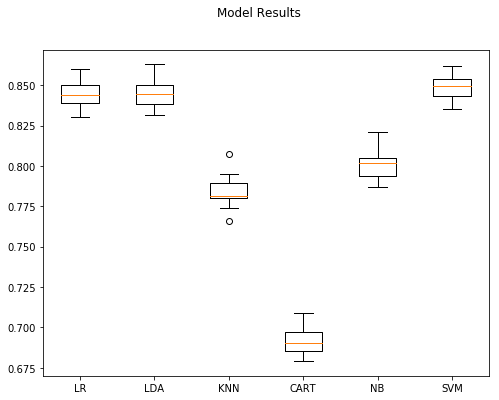

In [267]:
results, _df = trainModels(doc2vecModel.docvecs, df.iloc[:, 1], modelsToRun = 'all')
print(_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))
makeWhisker(results)

### Standard model comments

The first thing I noticed right away is how much faster training the set of models was.  Training wrapped up in about 9 mins compared to the sometimes hours required in previous write-ups.  Accuracy was also high being only two percentage points less then the baseline model:


|Model|Accuracy|Best Params                                      |
|-------------------|--------|-----------------------------------|
|LR (baseline)      |86.35%  |{'LR__C': 0.1, 'LR__penalty': 'l1'}|
|SVM centroid       |86.36%  |Scikit-learn defaults              |
|SVM Doc2Vec        |84.48%  |Scikit-learn defaults              |
<div style="clear:both"></div>

Clearly for very large data sets the small drop in accuracy might be more than offset by the greatly reduced training time required.

# Tuning Doc2Vec

Let's run through the steps above again, but this time we'll see if we can tune the Doc2Vec model and increase performance.  Clearly we could spend much time on tuning parameters, and so to get a head start I pulled some initial values based on some successful recommendation found on the Internet.  Two very helpful resources were:

1. [The original paper itself](https://arxiv.org/abs/1405.4053) by Mikilov and Le
2. [Gensim's Doc2Vec Tutorial](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/doc2vec-IMDB.ipynb)

One note however:  During my research I came across some discussion/controversy about the validity of the final accuracy score in the original paper.  This also included skepticism voiced by one of the paper's authors, Mikilov.  As such we won't try to replicate the paper's accuracy metrics exactly, as there is some question as to whether that is possible or not on this data set.

## Implementation

## Create the model, build the vocab, and train

In [65]:
doc2vecModel = Doc2Vec(dm = 0, vector_size = 100, negative = 5, hs = 0, min_count = 2, sample = 0, epochs = 20, workers = cores)
doc2vecModel.build_vocab(taggedDocs)
doc2vecModel.train(taggedDocs, total_examples = doc2vecModel.corpus_count, epochs = doc2vecModel.epochs)

2018-11-07 15:23:04,710 : INFO : collecting all words and their counts
2018-11-07 15:23:04,710 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-11-07 15:23:05,091 : INFO : PROGRESS: at example #10000, processed 2385574 words (6212835/s), 51527 word types, 10000 tags
2018-11-07 15:23:05,498 : INFO : PROGRESS: at example #20000, processed 4747503 words (5848673/s), 67813 word types, 20000 tags
2018-11-07 15:23:05,684 : INFO : collected 74218 word types and 25000 unique tags from a corpus of 25000 examples and 5920713 words
2018-11-07 15:23:05,684 : INFO : Loading a fresh vocabulary
2018-11-07 15:23:06,097 : INFO : effective_min_count=2 retains 46350 unique words (62% of original 74218, drops 27868)
2018-11-07 15:23:06,097 : INFO : effective_min_count=2 leaves 5892845 word corpus (99% of original 5920713, drops 27868)
2018-11-07 15:23:06,207 : INFO : deleting the raw counts dictionary of 74218 items
2018-11-07 15:23:06,217 : INFO : sample=0 downsamples 

2018-11-07 15:23:34,992 : INFO : EPOCH 9 - PROGRESS: at 27.90% examples, 1663395 words/s, in_qsize 7, out_qsize 0
2018-11-07 15:23:36,009 : INFO : EPOCH 9 - PROGRESS: at 58.38% examples, 1738725 words/s, in_qsize 8, out_qsize 1
2018-11-07 15:23:37,012 : INFO : EPOCH 9 - PROGRESS: at 87.32% examples, 1726591 words/s, in_qsize 8, out_qsize 0
2018-11-07 15:23:37,364 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 15:23:37,374 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 15:23:37,384 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 15:23:37,384 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 15:23:37,384 : INFO : EPOCH - 9 : training on 5920713 raw words (5917845 effective words) took 3.4s, 1748765 effective words/s
2018-11-07 15:23:38,393 : INFO : EPOCH 10 - PROGRESS: at 28.90% examples, 1725048 words/s, in_qsize 6, out_qsize 1
2018-11-07 15:23:39,397 : INFO : EPOCH 10

2018-11-07 15:24:07,465 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 15:24:07,465 : INFO : EPOCH - 18 : training on 5920713 raw words (5917845 effective words) took 3.5s, 1702003 effective words/s
2018-11-07 15:24:08,490 : INFO : EPOCH 19 - PROGRESS: at 28.91% examples, 1715463 words/s, in_qsize 8, out_qsize 0
2018-11-07 15:24:09,492 : INFO : EPOCH 19 - PROGRESS: at 61.45% examples, 1821318 words/s, in_qsize 7, out_qsize 0
2018-11-07 15:24:10,495 : INFO : EPOCH 19 - PROGRESS: at 90.83% examples, 1788350 words/s, in_qsize 7, out_qsize 0
2018-11-07 15:24:10,726 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 15:24:10,748 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 15:24:10,748 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 15:24:10,748 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 15:24:10,748 : INFO : EPOCH - 19 : training on 592

## Train and assess classifiers

Training LR ....
Training LDA ....
Training KNN ....
Training CART ....
Training NB ....
Training SVM ....
  Model  Accuracy    StdDev
5   SVM   0.88448  0.007694
1   LDA   0.88356  0.007032
0    LR   0.88356  0.007096
4    NB   0.85056  0.007140
2   KNN   0.81616  0.007621
3  CART   0.69908  0.008620


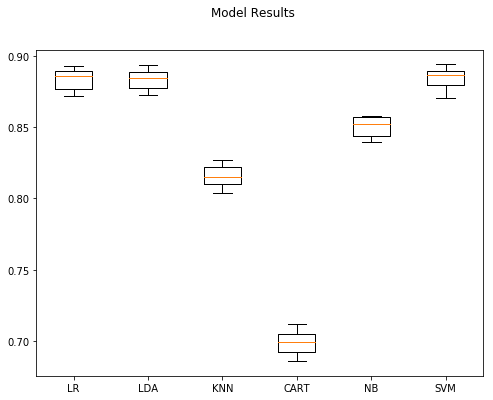

In [270]:
results, _df = trainModels(doc2vecModel.docvecs, df.iloc[:, 1], modelsToRun = 'all')
print(_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))
makeWhisker(results)

## Comments

Things are clearly off to a good start with tuning.  We picked up four percentage points from our first Doc2Vec model, achieved the best performing model to date, and still maintained the speed increases we enjoyed above.  

Comparison table for reference:


|Model|Accuracy|Best Params                                      |
|--------------------------|--------|-----------------------------------|
|LR (baseline)             |86.35%  |{'LR__C': 0.1, 'LR__penalty': 'l1'}|
|SVM centroid              |86.36%  |Scikit-learn defaults              |
|SVM Doc2Vec               |84.48%  |Scikit-learn defaults              |
|SVM Doc2Vec Init tuning   |88.45%  |dm0, vs100, ng5, hs0, mc2, sm0, e20|

<div style="clear:both"></div>

# Combining Doc2Vec models

Another method we can explore is combining the outputs of two Doc2Vec models similar to an ensemble.  Let's create three Doc2Vec models, train them, make a few combinations, and see if we realize any improvement in accuracy:

## Create Doc2Vec models, build vocabulary, and train

In [276]:
# Instantiate each model
m1 = Doc2Vec(dm=1, dm_concat=1, size=100, window=5, negative=5, hs=0, min_count=2, workers=cores)
m2 = Doc2Vec(dm=0, size=100, negative=5, hs=0, min_count=2, workers=cores)
m3 = Doc2Vec(dm=1, dm_mean=1, size=100, window=10, negative=5, hs=0, min_count=2, workers=cores)

# Build vocab with first model
m1.build_vocab(taggedDocs)

# Share first model's vocab scan w/ the other models
m2.reset_from(m1)
m3.reset_from(m1)

# Model training params
alpha, min_alpha, passes = (0.025, 0.001, 20)

# Train each model on the labeled training data
m1.train(taggedDocs, total_examples = m1.corpus_count, start_alpha = alpha, end_alpha = min_alpha, epochs = passes)
m2.train(taggedDocs, total_examples = m2.corpus_count, start_alpha = alpha, end_alpha = min_alpha, epochs = passes)
m3.train(taggedDocs, total_examples = m3.corpus_count, start_alpha = alpha, end_alpha = min_alpha, epochs = passes)

2018-11-07 08:57:35,269 : INFO : using concatenative 1100-dimensional layer1
2018-11-07 08:57:35,300 : INFO : collecting all words and their counts
2018-11-07 08:57:35,300 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-11-07 08:57:35,662 : INFO : PROGRESS: at example #10000, processed 2385574 words (6665409/s), 51527 word types, 10000 tags
2018-11-07 08:57:36,068 : INFO : PROGRESS: at example #20000, processed 4747503 words (5903115/s), 67813 word types, 20000 tags
2018-11-07 08:57:36,241 : INFO : collected 74218 word types and 25000 unique tags from a corpus of 25000 examples and 5920713 words
2018-11-07 08:57:36,241 : INFO : Loading a fresh vocabulary
2018-11-07 08:57:36,349 : INFO : effective_min_count=2 retains 46350 unique words (62% of original 74218, drops 27868)
2018-11-07 08:57:36,349 : INFO : effective_min_count=2 leaves 5892845 word corpus (99% of original 5920713, drops 27868)
2018-11-07 08:57:36,458 : INFO : deleting the raw counts dic

2018-11-07 08:58:23,559 : INFO : EPOCH 5 - PROGRESS: at 67.01% examples, 492176 words/s, in_qsize 7, out_qsize 0
2018-11-07 08:58:24,567 : INFO : EPOCH 5 - PROGRESS: at 77.32% examples, 486628 words/s, in_qsize 8, out_qsize 0
2018-11-07 08:58:25,595 : INFO : EPOCH 5 - PROGRESS: at 88.37% examples, 487590 words/s, in_qsize 8, out_qsize 1
2018-11-07 08:58:26,595 : INFO : EPOCH 5 - PROGRESS: at 99.00% examples, 484007 words/s, in_qsize 5, out_qsize 1
2018-11-07 08:58:26,642 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 08:58:26,642 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 08:58:26,658 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 08:58:26,658 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 08:58:26,658 : INFO : EPOCH - 5 : training on 5920713 raw words (4442498 effective words) took 9.2s, 485280 effective words/s
2018-11-07 08:58:27,666 : INFO : EPOCH 6 - PROG

2018-11-07 08:59:13,167 : INFO : EPOCH 11 - PROGRESS: at 22.90% examples, 503549 words/s, in_qsize 6, out_qsize 1
2018-11-07 08:59:14,214 : INFO : EPOCH 11 - PROGRESS: at 35.93% examples, 523401 words/s, in_qsize 8, out_qsize 0
2018-11-07 08:59:15,220 : INFO : EPOCH 11 - PROGRESS: at 46.82% examples, 511020 words/s, in_qsize 7, out_qsize 0
2018-11-07 08:59:16,261 : INFO : EPOCH 11 - PROGRESS: at 58.38% examples, 510060 words/s, in_qsize 7, out_qsize 1
2018-11-07 08:59:17,268 : INFO : EPOCH 11 - PROGRESS: at 68.82% examples, 498452 words/s, in_qsize 8, out_qsize 0
2018-11-07 08:59:18,308 : INFO : EPOCH 11 - PROGRESS: at 80.65% examples, 499747 words/s, in_qsize 7, out_qsize 0
2018-11-07 08:59:19,316 : INFO : EPOCH 11 - PROGRESS: at 91.89% examples, 499690 words/s, in_qsize 8, out_qsize 0
2018-11-07 08:59:19,939 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 08:59:19,939 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 08:59:19,

2018-11-07 09:00:04,355 : INFO : EPOCH - 16 : training on 5920713 raw words (4441096 effective words) took 9.1s, 489684 effective words/s
2018-11-07 09:00:05,363 : INFO : EPOCH 17 - PROGRESS: at 11.20% examples, 500370 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:00:06,377 : INFO : EPOCH 17 - PROGRESS: at 22.17% examples, 499475 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:00:07,384 : INFO : EPOCH 17 - PROGRESS: at 34.68% examples, 516381 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:00:08,404 : INFO : EPOCH 17 - PROGRESS: at 46.82% examples, 519018 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:00:09,398 : INFO : EPOCH 17 - PROGRESS: at 58.38% examples, 519070 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:00:10,405 : INFO : EPOCH 17 - PROGRESS: at 69.44% examples, 513163 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:00:11,423 : INFO : EPOCH 17 - PROGRESS: at 80.78% examples, 509079 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:00:12,426 : INFO : EPOCH 17 - PROGRESS: at 92.94% 

2018-11-07 09:00:48,032 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 09:00:48,032 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 09:00:48,048 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 09:00:48,048 : INFO : EPOCH - 3 : training on 5920713 raw words (4440775 effective words) took 3.4s, 1325539 effective words/s
2018-11-07 09:00:49,058 : INFO : EPOCH 4 - PROGRESS: at 31.00% examples, 1383658 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:00:50,055 : INFO : EPOCH 4 - PROGRESS: at 63.47% examples, 1410777 words/s, in_qsize 6, out_qsize 1
2018-11-07 09:00:51,062 : INFO : EPOCH 4 - PROGRESS: at 95.79% examples, 1414358 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:00:51,171 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 09:00:51,171 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 09:00:51,187 : INFO : worker thread finished; awaiting

2018-11-07 09:01:23,159 : INFO : EPOCH 13 - PROGRESS: at 92.41% examples, 1363591 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:01:23,429 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 09:01:23,429 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 09:01:23,429 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 09:01:23,445 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 09:01:23,445 : INFO : EPOCH - 13 : training on 5920713 raw words (4440895 effective words) took 3.3s, 1356209 effective words/s
2018-11-07 09:01:24,449 : INFO : EPOCH 14 - PROGRESS: at 33.17% examples, 1477962 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:01:25,457 : INFO : EPOCH 14 - PROGRESS: at 64.36% examples, 1423846 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:01:26,463 : INFO : EPOCH 14 - PROGRESS: at 97.12% examples, 1427710 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:01:26,533 : INFO : work

2018-11-07 09:01:57,022 : INFO : EPOCH 2 - PROGRESS: at 13.61% examples, 611713 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:01:58,025 : INFO : EPOCH 2 - PROGRESS: at 25.17% examples, 562403 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:01:59,030 : INFO : EPOCH 2 - PROGRESS: at 39.13% examples, 582743 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:02:00,042 : INFO : EPOCH 2 - PROGRESS: at 53.40% examples, 596808 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:02:01,058 : INFO : EPOCH 2 - PROGRESS: at 66.19% examples, 587853 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:02:02,048 : INFO : EPOCH 2 - PROGRESS: at 80.78% examples, 596537 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:02:03,049 : INFO : EPOCH 2 - PROGRESS: at 95.29% examples, 602893 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:02:03,360 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 09:02:03,372 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 09:02:03,373 : I

2018-11-07 09:02:38,951 : INFO : EPOCH 10 - PROGRESS: at 21.01% examples, 943543 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:02:39,944 : INFO : EPOCH 10 - PROGRESS: at 43.75% examples, 976496 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:02:40,935 : INFO : EPOCH 10 - PROGRESS: at 65.07% examples, 962237 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:02:41,962 : INFO : EPOCH 10 - PROGRESS: at 87.67% examples, 970892 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:02:42,499 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 09:02:42,507 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 09:02:42,508 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 09:02:42,514 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 09:02:42,515 : INFO : EPOCH - 10 : training on 5920713 raw words (4441190 effective words) took 4.6s, 965982 effective words/s
2018-11-07 09:02:43,524 : INFO : EPOCH 11 

2018-11-07 09:03:18,207 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 09:03:18,222 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 09:03:18,222 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 09:03:18,222 : INFO : EPOCH - 18 : training on 5920713 raw words (4440395 effective words) took 4.4s, 1014866 effective words/s
2018-11-07 09:03:19,230 : INFO : EPOCH 19 - PROGRESS: at 21.66% examples, 973825 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:03:20,242 : INFO : EPOCH 19 - PROGRESS: at 45.80% examples, 1016968 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:03:21,245 : INFO : EPOCH 19 - PROGRESS: at 66.35% examples, 981236 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:03:22,249 : INFO : EPOCH 19 - PROGRESS: at 87.85% examples, 973804 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:03:22,723 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 09:03:22,725 : INFO : worker 

## Combination one:  Train and assess classifiers

len(xTrain) 25000
Training LR ....
Training LDA ....
Training SVM ....
  Model  Accuracy    StdDev
2   SVM   0.88576  0.007732
1   LDA   0.88476  0.007012
0    LR   0.88392  0.006209


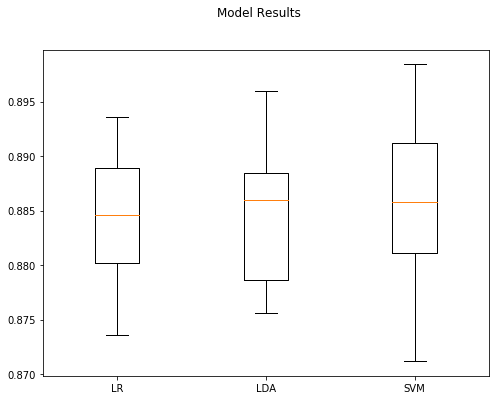

In [277]:
# Build the feature set by combining vectors from multiple models (m1 and m2)
xTrain = []

for i in range(0, len(taggedDocs)):
    xTrain.append(np.hstack((m1.docvecs[i], m2.docvecs[i])))
    
print("len(xTrain)", len(xTrain))

results, _df = trainModels(xTrain, df.iloc[:, 1], modelsToRun = ['SVM', 'LDA', 'LR'])
print(_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))
makeWhisker(results)

## Combination two:  Train and assess classifiers

len(xTrain) 25000
Training LR ....
Training LDA ....
Training SVM ....
  Model  Accuracy    StdDev
0    LR   0.88724  0.007441
1   LDA   0.88708  0.008383
2   SVM   0.88604  0.007387


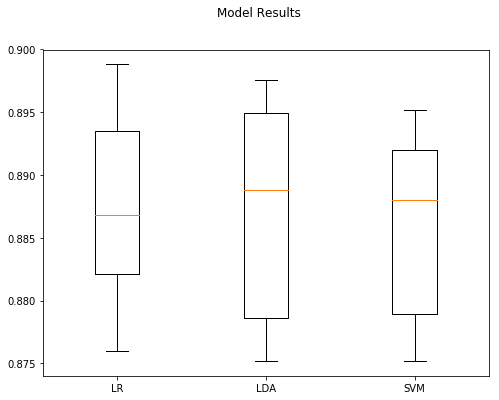

In [278]:
# Build the feature set by combining vectors from multiple models (m2 and m3)
xTrain = []

for i in range(0, len(taggedDocs)):
    xTrain.append(np.hstack((m2.docvecs[i], m3.docvecs[i])))
    
print("len(xTrain)", len(xTrain))

results, _df = trainModels(xTrain, df.iloc[:, 1], modelsToRun = ['SVM', 'LDA', 'LR'])
print(_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))
makeWhisker(results)

## Comments

We picked up less than a full percentage point of accuracy, so we'll pass on saying these methods were a clear improvement from what we had before.  Let's try some other methods next.

# Increased vocabulary and combined Doc2Vec models

What if we increase the size of the vocabulary the Doc2Vec model has access to?  In order to do this we'll feed all the review text we have--labeled and unlabeled--into the model's and then train and evaluate as before:

## Process and combine unlabeled data

In [20]:
# Pull in the unlabeled data since it can also be utilized by Doc2Vec when building the vocab
unlabeledTrainData = os.path.join(dataPath, 'unlabeledTrainData.tsv')
dfUn = pd.read_csv(unlabeledTrainData, sep = '\t', header = 0, quoting = 3)

In [66]:
# Create an all document object we can pass to the models
allDocs = taggedDocs.copy()

for s in dfUn.iloc[:,1]:
    clean = cleanReview(s)
    i = len(allDocs)
    allDocs.append(TaggedDocument(clean, [i]))    
                   
len(allDocs)

75000

## Create Doc2Vec models, build vocabulary, and train

In [281]:
# Instantiate each model
m1 = Doc2Vec(dm=1, dm_concat=1, size=100, window=5, negative=5, hs=0, min_count=2, workers=cores)
m2 = Doc2Vec(dm=0, size=100, negative=5, hs=0, min_count=2, workers=cores)
m3 = Doc2Vec(dm=1, dm_mean=1, size=100, window=10, negative=5, hs=0, min_count=2, workers=cores)

# Build vocab with first model using all documents
m1.build_vocab(allDocs)

# Share first model's vocab scan w/ the other models
m2.reset_from(m1)
m3.reset_from(m1)

# Model training params
alpha, min_alpha, passes = (0.025, 0.001, 20)

# Train each model on the labeled training data
m1.train(taggedDocs, total_examples = m1.corpus_count, start_alpha = alpha, end_alpha = min_alpha, epochs = passes)
m2.train(taggedDocs, total_examples = m2.corpus_count, start_alpha = alpha, end_alpha = min_alpha, epochs = passes)
m3.train(taggedDocs, total_examples = m3.corpus_count, start_alpha = alpha, end_alpha = min_alpha, epochs = passes)

2018-11-07 09:27:52,172 : INFO : using concatenative 1100-dimensional layer1
2018-11-07 09:27:52,219 : INFO : collecting all words and their counts
2018-11-07 09:27:52,219 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-11-07 09:27:52,583 : INFO : PROGRESS: at example #10000, processed 2385574 words (6245021/s), 51527 word types, 10000 tags
2018-11-07 09:27:52,999 : INFO : PROGRESS: at example #20000, processed 4747503 words (5882504/s), 67813 word types, 20000 tags
2018-11-07 09:27:53,388 : INFO : PROGRESS: at example #30000, processed 7100124 words (6290394/s), 81670 word types, 30000 tags
2018-11-07 09:27:53,771 : INFO : PROGRESS: at example #40000, processed 9467843 words (6016233/s), 93389 word types, 40000 tags
2018-11-07 09:27:54,200 : INFO : PROGRESS: at example #50000, processed 11865784 words (5719378/s), 103474 word types, 50000 tags
2018-11-07 09:27:54,639 : INFO : PROGRESS: at example #60000, processed 14248889 words (5370833/s), 112175

2018-11-07 09:28:37,514 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 09:28:37,514 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 09:28:37,514 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 09:28:37,529 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 09:28:37,529 : INFO : EPOCH - 4 : training on 5920713 raw words (4453594 effective words) took 9.1s, 487401 effective words/s
2018-11-07 09:28:37,529 : WARNING : EPOCH - 4 : supplied example count (25000) did not equal expected count (75000)
2018-11-07 09:28:38,522 : INFO : EPOCH 5 - PROGRESS: at 3.35% examples, 451008 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:28:39,538 : INFO : EPOCH 5 - PROGRESS: at 7.22% examples, 486823 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:28:40,562 : INFO : EPOCH 5 - PROGRESS: at 10.84% examples, 481120 words/s, in_qsize 6, out_qsize 1
2018-11-07 09:28:41,570 : INFO : EPOCH 5 - PRO

2018-11-07 09:29:22,092 : WARNING : EPOCH - 9 : supplied example count (25000) did not equal expected count (75000)
2018-11-07 09:29:23,075 : INFO : EPOCH 10 - PROGRESS: at 3.75% examples, 501432 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:29:24,110 : INFO : EPOCH 10 - PROGRESS: at 7.63% examples, 511296 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:29:25,150 : INFO : EPOCH 10 - PROGRESS: at 11.39% examples, 502735 words/s, in_qsize 8, out_qsize 2
2018-11-07 09:29:26,161 : INFO : EPOCH 10 - PROGRESS: at 15.61% examples, 515525 words/s, in_qsize 8, out_qsize 1
2018-11-07 09:29:27,166 : INFO : EPOCH 10 - PROGRESS: at 19.31% examples, 512502 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:29:28,176 : INFO : EPOCH 10 - PROGRESS: at 23.24% examples, 513691 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:29:29,196 : INFO : EPOCH 10 - PROGRESS: at 27.25% examples, 514497 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:29:30,170 : INFO : EPOCH 10 - PROGRESS: at 30.92% examples, 511223 words/s

2018-11-07 09:30:10,514 : INFO : EPOCH 15 - PROGRESS: at 19.75% examples, 527428 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:30:11,521 : INFO : EPOCH 15 - PROGRESS: at 23.80% examples, 527442 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:30:12,552 : INFO : EPOCH 15 - PROGRESS: at 27.91% examples, 530146 words/s, in_qsize 6, out_qsize 1
2018-11-07 09:30:13,527 : INFO : EPOCH 15 - PROGRESS: at 31.83% examples, 527503 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:30:13,866 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 09:30:13,866 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 09:30:13,866 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 09:30:13,866 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 09:30:13,866 : INFO : EPOCH - 15 : training on 5920713 raw words (4453568 effective words) took 8.4s, 530489 effective words/s
2018-11-07 09:30:13,866 : WARNING : EPOCH 

2018-11-07 09:30:55,915 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 09:30:55,931 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 09:30:55,931 : INFO : EPOCH - 20 : training on 5920713 raw words (4454643 effective words) took 8.5s, 524073 effective words/s
2018-11-07 09:30:55,931 : WARNING : EPOCH - 20 : supplied example count (25000) did not equal expected count (75000)
2018-11-07 09:30:55,931 : INFO : training on a 118414260 raw words (89080487 effective words) took 175.3s, 508206 effective words/s
2018-11-07 09:30:55,931 : INFO : training model with 4 workers on 74453 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
2018-11-07 09:30:56,930 : INFO : EPOCH 1 - PROGRESS: at 10.34% examples, 1388444 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:30:57,933 : INFO : EPOCH 1 - PROGRESS: at 19.63% examples, 1317411 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:30:58,937 : INFO : EPOCH 1 - PROGRESS: 

2018-11-07 09:31:25,064 : INFO : EPOCH - 8 : training on 5920713 raw words (4453076 effective words) took 3.3s, 1342013 effective words/s
2018-11-07 09:31:25,067 : WARNING : EPOCH - 8 : supplied example count (25000) did not equal expected count (75000)
2018-11-07 09:31:26,082 : INFO : EPOCH 9 - PROGRESS: at 10.17% examples, 1366745 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:31:27,114 : INFO : EPOCH 9 - PROGRESS: at 20.43% examples, 1367655 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:31:28,115 : INFO : EPOCH 9 - PROGRESS: at 28.70% examples, 1277551 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:31:28,515 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 09:31:28,515 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 09:31:28,515 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 09:31:28,515 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 09:31:28,515 : INFO : EPOCH -

2018-11-07 09:31:56,229 : INFO : EPOCH 17 - PROGRESS: at 21.21% examples, 1417316 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:31:57,226 : INFO : EPOCH 17 - PROGRESS: at 31.43% examples, 1395973 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:31:57,383 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 09:31:57,399 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 09:31:57,399 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 09:31:57,399 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 09:31:57,399 : INFO : EPOCH - 17 : training on 5920713 raw words (4453679 effective words) took 3.2s, 1396286 effective words/s
2018-11-07 09:31:57,399 : WARNING : EPOCH - 17 : supplied example count (25000) did not equal expected count (75000)
2018-11-07 09:31:58,404 : INFO : EPOCH 18 - PROGRESS: at 10.84% examples, 1462029 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:31:59,404 : INFO : EP

2018-11-07 09:32:27,377 : INFO : EPOCH 5 - PROGRESS: at 5.60% examples, 753054 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:32:28,380 : INFO : EPOCH 5 - PROGRESS: at 11.39% examples, 763528 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:32:29,395 : INFO : EPOCH 5 - PROGRESS: at 18.13% examples, 807657 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:32:30,413 : INFO : EPOCH 5 - PROGRESS: at 24.91% examples, 830572 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:32:31,428 : INFO : EPOCH 5 - PROGRESS: at 30.98% examples, 819310 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:32:31,787 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 09:32:31,798 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 09:32:31,806 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 09:32:31,810 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 09:32:31,811 : INFO : EPOCH - 5 : training on 5920713 raw wor

2018-11-07 09:33:06,025 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 09:33:06,025 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 09:33:06,025 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 09:33:06,025 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 09:33:06,025 : INFO : EPOCH - 12 : training on 5920713 raw words (4455015 effective words) took 4.7s, 957348 effective words/s
2018-11-07 09:33:06,025 : WARNING : EPOCH - 12 : supplied example count (25000) did not equal expected count (75000)
2018-11-07 09:33:07,026 : INFO : EPOCH 13 - PROGRESS: at 7.16% examples, 962708 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:33:08,027 : INFO : EPOCH 13 - PROGRESS: at 14.27% examples, 954522 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:33:09,061 : INFO : EPOCH 13 - PROGRESS: at 21.10% examples, 937978 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:33:10,069 : INFO : EPOCH 1

2018-11-07 09:33:39,642 : INFO : EPOCH 20 - PROGRESS: at 5.76% examples, 780953 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:33:40,646 : INFO : EPOCH 20 - PROGRESS: at 11.92% examples, 802197 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:33:41,659 : INFO : EPOCH 20 - PROGRESS: at 17.63% examples, 787545 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:33:42,666 : INFO : EPOCH 20 - PROGRESS: at 24.16% examples, 805623 words/s, in_qsize 8, out_qsize 0
2018-11-07 09:33:43,661 : INFO : EPOCH 20 - PROGRESS: at 30.11% examples, 802872 words/s, in_qsize 7, out_qsize 0
2018-11-07 09:33:44,099 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 09:33:44,115 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 09:33:44,115 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 09:33:44,115 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 09:33:44,115 : INFO : EPOCH - 20 : training on 5920713 r

## Combination one:  Train and assess classifiers

len(xTrain) 25000
Training LR ....
Training LDA ....
Training SVM ....
  Model  Accuracy    StdDev
2   SVM   0.88796  0.006929
1   LDA   0.88752  0.007013
0    LR   0.88744  0.007234


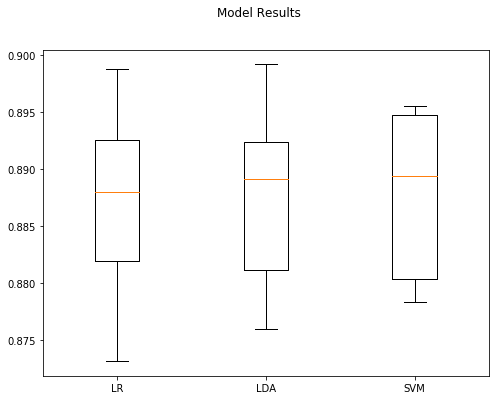

In [282]:
# Build the feature set by combining vectors from multiple models (m1 and m2)
xTrain = []

for i in range(0, len(taggedDocs)):
    xTrain.append(np.hstack((m1.docvecs[i], m2.docvecs[i])))
    
print("len(xTrain)", len(xTrain))

results, _df = trainModels(xTrain, df.iloc[:, 1], modelsToRun = ['SVM', 'LDA', 'LR'])
print(_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))
makeWhisker(results)

## Combination Two:  Train and assess classifiers

len(xTrain) 25000
Training LR ....
Training LDA ....
Training SVM ....
  Model  Accuracy    StdDev
0    LR   0.88872  0.007848
1   LDA   0.88792  0.007308
2   SVM   0.88728  0.008346


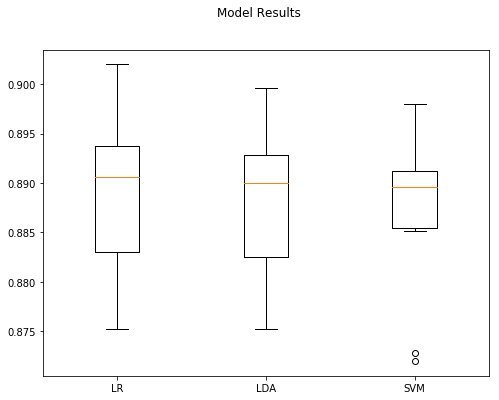

In [283]:
# Build the feature set by combining vectors from multiple models (m2 and m3)
xTrain = []

for i in tqdm(range(0, len(taggedDocs))):
    xTrain.append(np.hstack((m2.docvecs[i], m3.docvecs[i])))
    
print("len(xTrain)", len(xTrain))

results, _df = trainModels(xTrain, df.iloc[:, 1], modelsToRun = ['SVM', 'LDA', 'LR'])
print(_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))

makeWhisker(results)

## Comments

As before we picked up less than a full percentage point of accuracy, but we did increase by a small amount.  So it does appear we're heading the right direction.  Let's keep going.

# Manual training and feature set creation utilizing combined Doc2Vec models

Next we'll try the same three Doc2Vec models we utilized before with a vocabulary created from the full suite of review text.  We'll also train these models manually and adjust the alpha value as we go, and we'll train the models on the _full_ set of review text.  Once this is done we'll utilize the `infer_vector` method of the models to manually create the labeled document vectors (i.e. our feature set).

## Create Doc2Vec models, build vocabulary, and train

In [29]:
# Instantiate each model
m1 = Doc2Vec(dm=1, dm_concat=1, size=100, window=5, negative=5, hs=0, min_count=2, workers=cores)
m2 = Doc2Vec(dm=0, size=100, negative=5, hs=0, min_count=2, workers=cores)
m3 = Doc2Vec(dm=1, dm_mean=1, size=100, window=10, negative=5, hs=0, min_count=2, workers=cores)

# Build vocab with first model using all documents
m1.build_vocab(allDocs)

# Share first model's vocab scan w/ the other models
m2.reset_from(m1)
m3.reset_from(m1)

# Set training params
alpha, min_alpha, passes = (0.025, 0.001, 20)
alpha_delta = (alpha - min_alpha) / passes

# Train the models
for epoch in range(passes):  
    # Shuffle the documents; literature reports this provides the best results
    shuffle(allDocs)
    
    # Train the models
    m1.alpha, m1.min_alpha = alpha, alpha
    m1.train(allDocs, total_examples = m1.corpus_count, epochs = 1)
    
    m2.alpha, m2.min_alpha = alpha, alpha
    m2.train(allDocs, total_examples = m2.corpus_count, epochs = 1)
    
    m3.alpha, m3.min_alpha = alpha, alpha
    m3.train(allDocs, total_examples = m3.corpus_count, epochs = 1)
   
    alpha -= alpha_delta

2018-11-07 11:32:08,726 : INFO : using concatenative 1100-dimensional layer1
2018-11-07 11:32:08,726 : INFO : collecting all words and their counts
2018-11-07 11:32:08,726 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-11-07 11:32:09,103 : INFO : PROGRESS: at example #10000, processed 2377669 words (6377947/s), 52840 word types, 74993 tags
2018-11-07 11:32:09,478 : INFO : PROGRESS: at example #20000, processed 4756007 words (6300429/s), 70981 word types, 74999 tags
2018-11-07 11:32:09,884 : INFO : PROGRESS: at example #30000, processed 7142727 words (5987074/s), 84148 word types, 74999 tags
2018-11-07 11:32:10,275 : INFO : PROGRESS: at example #40000, processed 9494960 words (5864635/s), 94492 word types, 74999 tags
2018-11-07 11:32:10,648 : INFO : PROGRESS: at example #50000, processed 11863059 words (6403783/s), 103884 word types, 74999 tags
2018-11-07 11:32:11,014 : INFO : PROGRESS: at example #60000, processed 14210696 words (6440719/s), 112023

2018-11-07 11:32:57,852 : INFO : EPOCH 1 - PROGRESS: at 7.04% examples, 951964 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:32:58,854 : INFO : EPOCH 1 - PROGRESS: at 14.05% examples, 937395 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:32:59,861 : INFO : EPOCH 1 - PROGRESS: at 21.43% examples, 945453 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:33:00,865 : INFO : EPOCH 1 - PROGRESS: at 28.65% examples, 954786 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:33:01,871 : INFO : EPOCH 1 - PROGRESS: at 35.72% examples, 951464 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:33:02,872 : INFO : EPOCH 1 - PROGRESS: at 43.36% examples, 960910 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:33:03,885 : INFO : EPOCH 1 - PROGRESS: at 50.57% examples, 960429 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:33:04,885 : INFO : EPOCH 1 - PROGRESS: at 57.45% examples, 954791 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:33:05,879 : INFO : EPOCH 1 - PROGRESS: at 64.86% examples, 959078 words/s, in_qsize

2018-11-07 11:33:52,304 : INFO : EPOCH 1 - PROGRESS: at 14.41% examples, 957991 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:33:53,308 : INFO : EPOCH 1 - PROGRESS: at 21.42% examples, 947784 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:33:54,328 : INFO : EPOCH 1 - PROGRESS: at 29.07% examples, 962570 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:33:55,324 : INFO : EPOCH 1 - PROGRESS: at 36.40% examples, 966443 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:33:56,328 : INFO : EPOCH 1 - PROGRESS: at 43.25% examples, 957045 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:33:57,347 : INFO : EPOCH 1 - PROGRESS: at 50.12% examples, 951374 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:33:58,356 : INFO : EPOCH 1 - PROGRESS: at 57.23% examples, 950208 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:33:59,353 : INFO : EPOCH 1 - PROGRESS: at 64.40% examples, 949974 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:34:00,372 : INFO : EPOCH 1 - PROGRESS: at 71.75% examples, 953975 words/s, in_qsiz

2018-11-07 11:34:46,310 : INFO : EPOCH 1 - PROGRESS: at 21.58% examples, 950565 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:34:47,318 : INFO : EPOCH 1 - PROGRESS: at 28.62% examples, 947573 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:34:48,336 : INFO : EPOCH 1 - PROGRESS: at 35.72% examples, 944635 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:34:49,339 : INFO : EPOCH 1 - PROGRESS: at 42.48% examples, 935435 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:34:50,343 : INFO : EPOCH 1 - PROGRESS: at 49.40% examples, 934959 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:34:51,346 : INFO : EPOCH 1 - PROGRESS: at 56.01% examples, 928286 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:34:52,371 : INFO : EPOCH 1 - PROGRESS: at 63.17% examples, 929670 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:34:53,360 : INFO : EPOCH 1 - PROGRESS: at 70.70% examples, 937712 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:34:54,369 : INFO : EPOCH 1 - PROGRESS: at 77.58% examples, 935888 words/s, in_qsiz

2018-11-07 11:35:40,526 : INFO : EPOCH 1 - PROGRESS: at 28.16% examples, 942118 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:35:41,530 : INFO : EPOCH 1 - PROGRESS: at 35.27% examples, 941857 words/s, in_qsize 6, out_qsize 1
2018-11-07 11:35:42,550 : INFO : EPOCH 1 - PROGRESS: at 42.34% examples, 941409 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:35:43,540 : INFO : EPOCH 1 - PROGRESS: at 49.36% examples, 940636 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:35:44,562 : INFO : EPOCH 1 - PROGRESS: at 56.50% examples, 941856 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:35:45,594 : INFO : EPOCH 1 - PROGRESS: at 63.19% examples, 935433 words/s, in_qsize 6, out_qsize 1
2018-11-07 11:35:46,586 : INFO : EPOCH 1 - PROGRESS: at 70.86% examples, 943043 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:35:47,589 : INFO : EPOCH 1 - PROGRESS: at 77.89% examples, 942917 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:35:48,569 : INFO : EPOCH 1 - PROGRESS: at 85.22% examples, 947410 words/s, in_qsiz

2018-11-07 11:36:34,210 : INFO : EPOCH 1 - PROGRESS: at 44.42% examples, 983849 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:36:35,225 : INFO : EPOCH 1 - PROGRESS: at 51.45% examples, 977779 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:36:36,226 : INFO : EPOCH 1 - PROGRESS: at 59.01% examples, 982269 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:36:37,225 : INFO : EPOCH 1 - PROGRESS: at 66.71% examples, 985628 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:36:38,233 : INFO : EPOCH 1 - PROGRESS: at 73.56% examples, 979144 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:36:39,236 : INFO : EPOCH 1 - PROGRESS: at 81.05% examples, 980927 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:36:40,242 : INFO : EPOCH 1 - PROGRESS: at 88.34% examples, 980413 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:36:41,246 : INFO : EPOCH 1 - PROGRESS: at 95.58% examples, 978516 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:36:41,792 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-

2018-11-07 11:37:27,941 : INFO : EPOCH 1 - PROGRESS: at 57.87% examples, 960661 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:37:28,946 : INFO : EPOCH 1 - PROGRESS: at 65.13% examples, 961709 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:37:29,953 : INFO : EPOCH 1 - PROGRESS: at 72.75% examples, 965803 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:37:30,958 : INFO : EPOCH 1 - PROGRESS: at 79.44% examples, 958930 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:37:31,959 : INFO : EPOCH 1 - PROGRESS: at 86.70% examples, 959638 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:37:32,976 : INFO : EPOCH 1 - PROGRESS: at 94.23% examples, 963859 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:37:33,803 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 11:37:33,803 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 11:37:33,803 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 11:37:33,819 : INFO : worker thread fi

2018-11-07 11:38:21,428 : INFO : EPOCH 1 - PROGRESS: at 65.01% examples, 962377 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:38:22,429 : INFO : EPOCH 1 - PROGRESS: at 72.60% examples, 966653 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:38:23,429 : INFO : EPOCH 1 - PROGRESS: at 79.53% examples, 963321 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:38:24,449 : INFO : EPOCH 1 - PROGRESS: at 86.57% examples, 960053 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:38:25,454 : INFO : EPOCH 1 - PROGRESS: at 94.00% examples, 961994 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:38:26,308 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 11:38:26,308 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 11:38:26,308 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 11:38:26,308 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 11:38:26,308 : INFO : EPOCH - 1 : training on 17797887 raw w

2018-11-07 11:39:16,381 : INFO : EPOCH 1 - PROGRESS: at 95.11% examples, 973361 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:39:16,978 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 11:39:16,978 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 11:39:16,978 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 11:39:16,978 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 11:39:16,979 : INFO : EPOCH - 1 : training on 17797887 raw words (13389786 effective words) took 13.7s, 977282 effective words/s
2018-11-07 11:39:16,979 : INFO : training on a 17797887 raw words (13389786 effective words) took 13.7s, 976830 effective words/s
2018-11-07 11:39:17,042 : INFO : training model with 4 workers on 74453 vocabulary and 1100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2018-11-07 11:39:18,058 : INFO : EPOCH 1 - PROGRESS: at 3.65% examples, 477414 words/s, in_qsize 8, ou

2018-11-07 11:40:08,430 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 11:40:08,445 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 11:40:08,445 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 11:40:08,445 : INFO : EPOCH - 1 : training on 17797887 raw words (13393686 effective words) took 13.7s, 977467 effective words/s
2018-11-07 11:40:08,445 : INFO : training on a 17797887 raw words (13393686 effective words) took 13.7s, 977053 effective words/s
2018-11-07 11:40:08,508 : INFO : training model with 4 workers on 74453 vocabulary and 1100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2018-11-07 11:40:09,510 : INFO : EPOCH 1 - PROGRESS: at 3.81% examples, 495476 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:40:10,544 : INFO : EPOCH 1 - PROGRESS: at 7.57% examples, 493464 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:40:11,535 : INFO : EPOCH 1 - PROGRESS: at 11.46% examples, 501664 wo

2018-11-07 11:40:58,750 : INFO : training model with 4 workers on 74453 vocabulary and 1100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2018-11-07 11:40:59,797 : INFO : EPOCH 1 - PROGRESS: at 3.35% examples, 443690 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:41:00,777 : INFO : EPOCH 1 - PROGRESS: at 6.99% examples, 465009 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:41:01,802 : INFO : EPOCH 1 - PROGRESS: at 10.57% examples, 470973 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:41:02,812 : INFO : EPOCH 1 - PROGRESS: at 14.19% examples, 474261 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:41:03,826 : INFO : EPOCH 1 - PROGRESS: at 18.05% examples, 482319 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:41:04,857 : INFO : EPOCH 1 - PROGRESS: at 21.93% examples, 485713 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:41:05,852 : INFO : EPOCH 1 - PROGRESS: at 25.96% examples, 492895 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:41:06,873 : INFO : EPOCH 1 - PROGRESS: at 29.7

2018-11-07 11:41:52,417 : INFO : EPOCH 1 - PROGRESS: at 7.70% examples, 509185 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:41:53,433 : INFO : EPOCH 1 - PROGRESS: at 11.55% examples, 507905 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:41:54,448 : INFO : EPOCH 1 - PROGRESS: at 15.54% examples, 513434 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:41:55,431 : INFO : EPOCH 1 - PROGRESS: at 19.53% examples, 516756 words/s, in_qsize 8, out_qsize 1
2018-11-07 11:41:56,468 : INFO : EPOCH 1 - PROGRESS: at 23.33% examples, 512313 words/s, in_qsize 7, out_qsize 1
2018-11-07 11:41:57,483 : INFO : EPOCH 1 - PROGRESS: at 27.56% examples, 519381 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:41:58,492 : INFO : EPOCH 1 - PROGRESS: at 31.25% examples, 516004 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:41:59,491 : INFO : EPOCH 1 - PROGRESS: at 35.21% examples, 517182 words/s, in_qsize 5, out_qsize 2
2018-11-07 11:42:00,496 : INFO : EPOCH 1 - PROGRESS: at 39.26% examples, 519757 words/s, in_qsize

2018-11-07 11:42:47,302 : INFO : EPOCH 1 - PROGRESS: at 26.58% examples, 500182 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:42:48,338 : INFO : EPOCH 1 - PROGRESS: at 30.48% examples, 502551 words/s, in_qsize 7, out_qsize 2
2018-11-07 11:42:49,338 : INFO : EPOCH 1 - PROGRESS: at 33.80% examples, 495624 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:42:50,355 : INFO : EPOCH 1 - PROGRESS: at 37.68% examples, 497643 words/s, in_qsize 6, out_qsize 3
2018-11-07 11:42:51,374 : INFO : EPOCH 1 - PROGRESS: at 41.59% examples, 499798 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:42:52,377 : INFO : EPOCH 1 - PROGRESS: at 45.60% examples, 501915 words/s, in_qsize 6, out_qsize 1
2018-11-07 11:42:53,411 : INFO : EPOCH 1 - PROGRESS: at 49.69% examples, 504290 words/s, in_qsize 6, out_qsize 1
2018-11-07 11:42:54,412 : INFO : EPOCH 1 - PROGRESS: at 53.49% examples, 504419 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:42:55,432 : INFO : EPOCH 1 - PROGRESS: at 57.53% examples, 506313 words/s, in_qsiz

2018-11-07 11:43:41,367 : INFO : EPOCH 1 - PROGRESS: at 26.03% examples, 491404 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:43:42,367 : INFO : EPOCH 1 - PROGRESS: at 29.80% examples, 493913 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:43:43,374 : INFO : EPOCH 1 - PROGRESS: at 33.00% examples, 486540 words/s, in_qsize 8, out_qsize 1
2018-11-07 11:43:44,409 : INFO : EPOCH 1 - PROGRESS: at 37.06% examples, 490712 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:43:45,416 : INFO : EPOCH 1 - PROGRESS: at 40.84% examples, 491443 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:43:46,434 : INFO : EPOCH 1 - PROGRESS: at 44.89% examples, 495279 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:43:47,440 : INFO : EPOCH 1 - PROGRESS: at 48.58% examples, 495101 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:43:48,447 : INFO : EPOCH 1 - PROGRESS: at 52.51% examples, 496930 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:43:49,468 : INFO : EPOCH 1 - PROGRESS: at 56.20% examples, 495651 words/s, in_qsiz

2018-11-07 11:44:35,316 : INFO : EPOCH 1 - PROGRESS: at 39.35% examples, 517861 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:44:36,323 : INFO : EPOCH 1 - PROGRESS: at 43.20% examples, 517301 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:44:37,325 : INFO : EPOCH 1 - PROGRESS: at 47.23% examples, 519516 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:44:38,338 : INFO : EPOCH 1 - PROGRESS: at 50.98% examples, 517258 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:44:39,349 : INFO : EPOCH 1 - PROGRESS: at 54.83% examples, 517355 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:44:40,367 : INFO : EPOCH 1 - PROGRESS: at 58.65% examples, 516143 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:44:41,388 : INFO : EPOCH 1 - PROGRESS: at 62.52% examples, 515936 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:44:42,397 : INFO : EPOCH 1 - PROGRESS: at 66.08% examples, 514094 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:44:43,406 : INFO : EPOCH 1 - PROGRESS: at 69.87% examples, 512807 words/s, in_qsiz

2018-11-07 11:45:29,620 : INFO : EPOCH 1 - PROGRESS: at 41.64% examples, 501085 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:45:30,649 : INFO : EPOCH 1 - PROGRESS: at 45.32% examples, 499198 words/s, in_qsize 7, out_qsize 2
2018-11-07 11:45:31,654 : INFO : EPOCH 1 - PROGRESS: at 49.54% examples, 503678 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:45:32,658 : INFO : EPOCH 1 - PROGRESS: at 53.25% examples, 502829 words/s, in_qsize 5, out_qsize 2
2018-11-07 11:45:33,671 : INFO : EPOCH 1 - PROGRESS: at 57.33% examples, 505314 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:45:34,687 : INFO : EPOCH 1 - PROGRESS: at 61.27% examples, 505889 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:45:35,694 : INFO : EPOCH 1 - PROGRESS: at 65.11% examples, 507163 words/s, in_qsize 6, out_qsize 1
2018-11-07 11:45:36,711 : INFO : EPOCH 1 - PROGRESS: at 69.13% examples, 508353 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:45:37,744 : INFO : EPOCH 1 - PROGRESS: at 72.95% examples, 507998 words/s, in_qsiz

2018-11-07 11:46:24,294 : INFO : EPOCH 1 - PROGRESS: at 47.61% examples, 522078 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:46:25,316 : INFO : EPOCH 1 - PROGRESS: at 51.43% examples, 520315 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:46:26,324 : INFO : EPOCH 1 - PROGRESS: at 54.97% examples, 516749 words/s, in_qsize 5, out_qsize 2
2018-11-07 11:46:27,337 : INFO : EPOCH 1 - PROGRESS: at 58.50% examples, 513925 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:46:28,372 : INFO : EPOCH 1 - PROGRESS: at 62.52% examples, 514366 words/s, in_qsize 8, out_qsize 2
2018-11-07 11:46:29,391 : INFO : EPOCH 1 - PROGRESS: at 66.63% examples, 516094 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:46:30,410 : INFO : EPOCH 1 - PROGRESS: at 70.65% examples, 516396 words/s, in_qsize 6, out_qsize 1
2018-11-07 11:46:31,444 : INFO : EPOCH 1 - PROGRESS: at 74.73% examples, 517435 words/s, in_qsize 7, out_qsize 2
2018-11-07 11:46:32,474 : INFO : EPOCH 1 - PROGRESS: at 78.89% examples, 518031 words/s, in_qsiz

2018-11-07 11:47:17,322 : INFO : EPOCH 1 - PROGRESS: at 58.79% examples, 520777 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:47:18,351 : INFO : EPOCH 1 - PROGRESS: at 62.72% examples, 520427 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:47:19,380 : INFO : EPOCH 1 - PROGRESS: at 66.95% examples, 522059 words/s, in_qsize 6, out_qsize 1
2018-11-07 11:47:20,387 : INFO : EPOCH 1 - PROGRESS: at 70.96% examples, 522079 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:47:21,390 : INFO : EPOCH 1 - PROGRESS: at 75.03% examples, 522912 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:47:22,406 : INFO : EPOCH 1 - PROGRESS: at 79.12% examples, 522942 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:47:23,409 : INFO : EPOCH 1 - PROGRESS: at 83.03% examples, 522945 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:47:24,410 : INFO : EPOCH 1 - PROGRESS: at 86.88% examples, 522348 words/s, in_qsize 8, out_qsize 1
2018-11-07 11:47:25,419 : INFO : EPOCH 1 - PROGRESS: at 90.98% examples, 523494 words/s, in_qsiz

2018-11-07 11:48:11,124 : INFO : EPOCH 1 - PROGRESS: at 73.19% examples, 509986 words/s, in_qsize 8, out_qsize 1
2018-11-07 11:48:12,128 : INFO : EPOCH 1 - PROGRESS: at 77.53% examples, 513184 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:48:13,128 : INFO : EPOCH 1 - PROGRESS: at 81.28% examples, 513023 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:48:14,130 : INFO : EPOCH 1 - PROGRESS: at 85.30% examples, 513757 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:48:15,137 : INFO : EPOCH 1 - PROGRESS: at 88.66% examples, 511221 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:48:16,142 : INFO : EPOCH 1 - PROGRESS: at 92.74% examples, 512812 words/s, in_qsize 8, out_qsize 0
2018-11-07 11:48:17,151 : INFO : EPOCH 1 - PROGRESS: at 96.64% examples, 512868 words/s, in_qsize 8, out_qsize 1
2018-11-07 11:48:17,921 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 11:48:17,950 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 11:48:17,957 : I

2018-11-07 11:49:04,804 : INFO : EPOCH 1 - PROGRESS: at 87.63% examples, 524210 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:49:05,805 : INFO : EPOCH 1 - PROGRESS: at 91.35% examples, 523295 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:49:06,831 : INFO : EPOCH 1 - PROGRESS: at 95.66% examples, 524958 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:49:07,864 : INFO : EPOCH 1 - PROGRESS: at 99.44% examples, 523957 words/s, in_qsize 7, out_qsize 0
2018-11-07 11:49:07,933 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-07 11:49:07,960 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-07 11:49:07,966 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-07 11:49:07,970 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-07 11:49:07,971 : INFO : EPOCH - 1 : training on 17797887 raw words (13392985 effective words) took 25.5s, 524628 effective words/s
2018-11-07 11:49:07,971 : INFO : training on

## Combination one:  Train and assess classifiers

In [44]:
# Build the feature set by combining vectors from multiple models (m2 and m3)
xTrain = []

infer_steps = 5
infer_alpha = 0.01

for i in tqdm(range(0, len(taggedDocs))):
    xTrain.append(np.hstack((
        m1.infer_vector(taggedDocs[i].words, steps=infer_steps, alpha=infer_alpha),
        m2.infer_vector(taggedDocs[i].words, steps=infer_steps, alpha=infer_alpha)
    )))
    
print("len(xTrain)", len(xTrain))

100%|██████████| 25000/25000 [02:14<00:00, 185.46it/s]


len(xTrain) 25000


Training LR ....
Training LDA ....
  Model  Accuracy    StdDev
0    LR   0.89324  0.007250
1   LDA   0.89308  0.008229


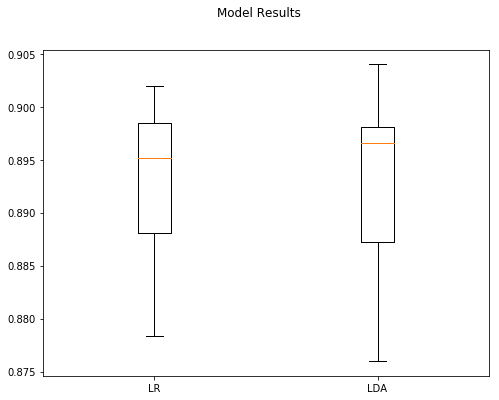

In [45]:
#results, _df = trainModels(xTrain, df.iloc[:, 1], modelsToRun = ['SVM', 'LDA', 'LR'])
results, _df = trainModels(xTrain, df.iloc[:, 1], modelsToRun = ['LDA', 'LR'])
print(_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))
makeWhisker(results)

## Combination two:  Train and assess classifiers

In [58]:
# Build the feature set by combining vectors from multiple models (m2 and m3)
xTrain = []

infer_steps = 7
infer_alpha = 0.01

for i in tqdm(range(0, len(taggedDocs))):
    xTrain.append(np.hstack((
        m1.infer_vector(taggedDocs[i].words, steps=infer_steps, alpha=infer_alpha),
        m2.infer_vector(taggedDocs[i].words, steps=infer_steps, alpha=infer_alpha),
        m3.infer_vector(taggedDocs[i].words, steps=infer_steps, alpha=infer_alpha)
    )))
    
print("len(xTrain)", len(xTrain))

100%|██████████| 25000/25000 [04:13<00:00, 98.71it/s] 


len(xTrain) 25000


Training LR ....
Training LDA ....
Training SVM ....
  Model  Accuracy    StdDev
0    LR   0.89532  0.008109
1   LDA   0.89492  0.008129
2   SVM   0.89136  0.008393


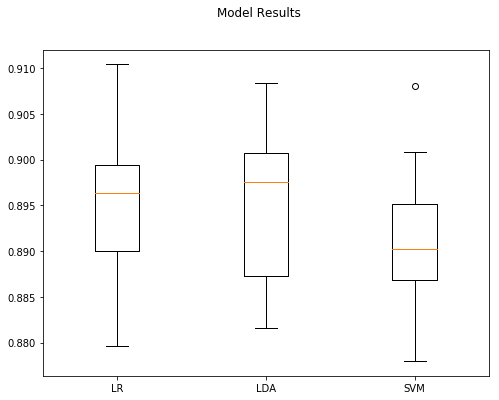

In [60]:
results, _df = trainModels(xTrain, df.iloc[:, 1], modelsToRun = ['SVM', 'LDA', 'LR'])
#results, _df = trainModels(xTrain, df.iloc[:, 1], modelsToRun = ['LDA', 'LR'])
print(_df.sort_values(by = ['Accuracy', 'StdDev', 'Model'], ascending = [False, True, True]))
makeWhisker(results)

## Comments

# Summary

In [76]:
%%html
<style>
table {float:left}
</style>

In this write-up we accomplished the following:

1. Created a set of word embeddings from the IMDb movie review text utilizing Word2vec
2. Clustered the embeddings utilizing a K-nearest neighbors algorithm into a set of centroids
3. Trained and evaluated the models from the last write-up against the centroid feature set

And finally, here is the baseline model's performance vs. the 'centroid' model we developed in this write-up:

|Model|Accuracy|Best Params                           |
|-------------------|--------|-----------------------------------|
|LR (baseline)      |86.35%  |{'LR__C': 0.1, 'LR__penalty': 'l1'}|
|Kaggle centroid    |84.68%  |Estimators = 100                   |
|SVM centroid       |86.36%  |Scikit-learn defaults              |

<div style="clear: both;"></div>

Similar to the last [last write-up](./Model-06.p2.ipynb) the work in this notebook was an interesting idea to explore, but ultimately didn't result in an overall performance increase versus the baseline model.  As such this line of exploration will be rejected in favor of keeping the current base line model and accuracy rating as benchmarks moving forward.